In [1]:
#!/usr/bin/python
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

sns.set_style("ticks")


In [2]:
#import latest simulation data
#df=pd.read_csv('grid_search.csv')
df=pd.read_csv('../../output/sim_results/opt_ratio_wide.csv')

df.columns = df.columns.str.replace('additivity', 'add')
df.columns = df.columns.str.replace('Neut', '')
df.columns = df.columns.str.replace('_mean', '')
df.columns = df.columns.str.replace('coverage', 'f')

#sensitivity variables
varz=['c0', 'ratio', 'hl_1', 'hl_2', 'omega_1', 'omega_2', 'muIC50_1',
       'muIC50_2', 'sigIC50_1', 'sigIC50_2']


In [3]:
#change to fraction resistant
df['omega_1']=1-df['omega_1']
df['omega_2']=1-df['omega_2']

In [4]:
df = df[(df['muIC50_1']>-3) & (df['muIC50_2']>-3)]

In [5]:
#restrict to lower doses
df = df[df['c0']<2000]

In [6]:
#lists of types

combo_model = ['min','BH','add']

endpoint = ['ID50','iip','ID50log10','neut',
                'ID50_f1','ID50_f10','ID50_f100','ID50_f1000','ID50_f1e4',
                'iip_f1','iip_f2','iip_f3','iip_f4',]

#pick thresholds of 100 and iip=2
endpoint_less = ['ID50','iip','ID50log10','neut','ID50_f100','iip_f2']

when = ['auc','trough']

In [7]:
df.shape

(12960, 114)

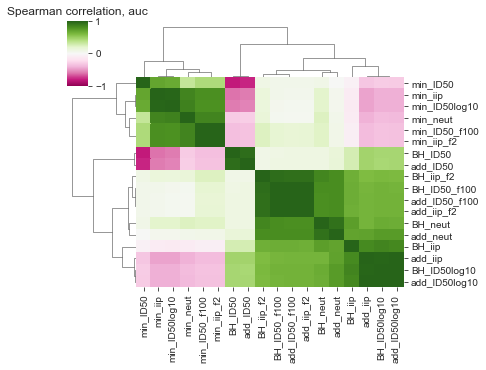

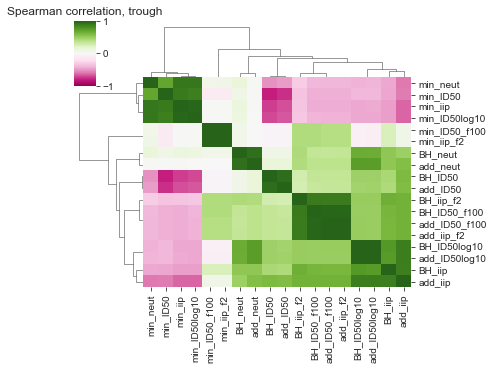

In [8]:
#get better list of outcome names

for w in when:
    outz=[]
    for cm in combo_model:
        for m in endpoint_less:
            outz.append(cm+'_'+m+'_'+w)
    
    tdf=df[outz]
    tdf.columns = tdf.columns.str.replace('_'+w, '') #remove the trough name from the column

    outcome_corr_mat=tdf.corr(method="spearman")

    g=sns.clustermap(outcome_corr_mat, annot=False, vmin=-1,vmax=1,cmap='PiYG', figsize=(6,5))
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90) # For x axis

    plt.title('Spearman correlation, '+w)
    plt.savefig('../../output/sim_results/figures/cluster_w_'+w+'3.pdf',dpi=600)


In [9]:
#the reordered outputs for trough clustering
clustered_outz = np.array(outz)[g.dendrogram_col.reordered_ind]

clustered_outz

array(['min_neut_trough', 'min_ID50_trough', 'min_iip_trough',
       'min_ID50log10_trough', 'min_ID50_f100_trough',
       'min_iip_f2_trough', 'BH_neut_trough', 'add_neut_trough',
       'BH_ID50_trough', 'add_ID50_trough', 'BH_iip_f2_trough',
       'BH_ID50_f100_trough', 'add_ID50_f100_trough', 'add_iip_f2_trough',
       'BH_ID50log10_trough', 'add_ID50log10_trough', 'BH_iip_trough',
       'add_iip_trough'], dtype='<U20')

0.5778356088213711 0.1504374854109376 0.9955738432841598 0.047477747356593145


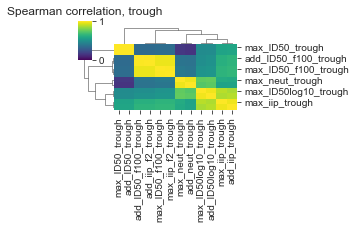

In [10]:
outzmaxadd= ['max_ID50_'+w,
 'max_iip_'+w,
 'max_ID50log10_'+w,
 'max_neut_'+w,
 'max_ID50_f100_'+w,
 'max_iip_f2_'+w,
 'add_ID50_'+w,
 'add_iip_'+w,
 'add_ID50log10_'+w,
 'add_neut_'+w,
 'add_ID50_f100_'+w,
 'add_iip_f2_'+w]


tdf=df[outzmaxadd]
outcome_corr_mat=tdf.corr(method="spearman")

g=sns.clustermap(outcome_corr_mat, annot=False, vmin=0,vmax=1,cmap='viridis', figsize=(4,3))
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90) # For x axis

plt.title('Spearman correlation, '+w)
plt.savefig('../../output/sim_results/figures/cluster_maxadd_'+w+'.pdf',dpi=600)


print(np.mean(np.mean(outcome_corr_mat[outcome_corr_mat<1],1)),
        np.min(np.min(outcome_corr_mat[outcome_corr_mat<1],1)),
        np.max(np.max(outcome_corr_mat[outcome_corr_mat<1],1)),
        np.std(np.std(outcome_corr_mat[outcome_corr_mat<1],1))
     )

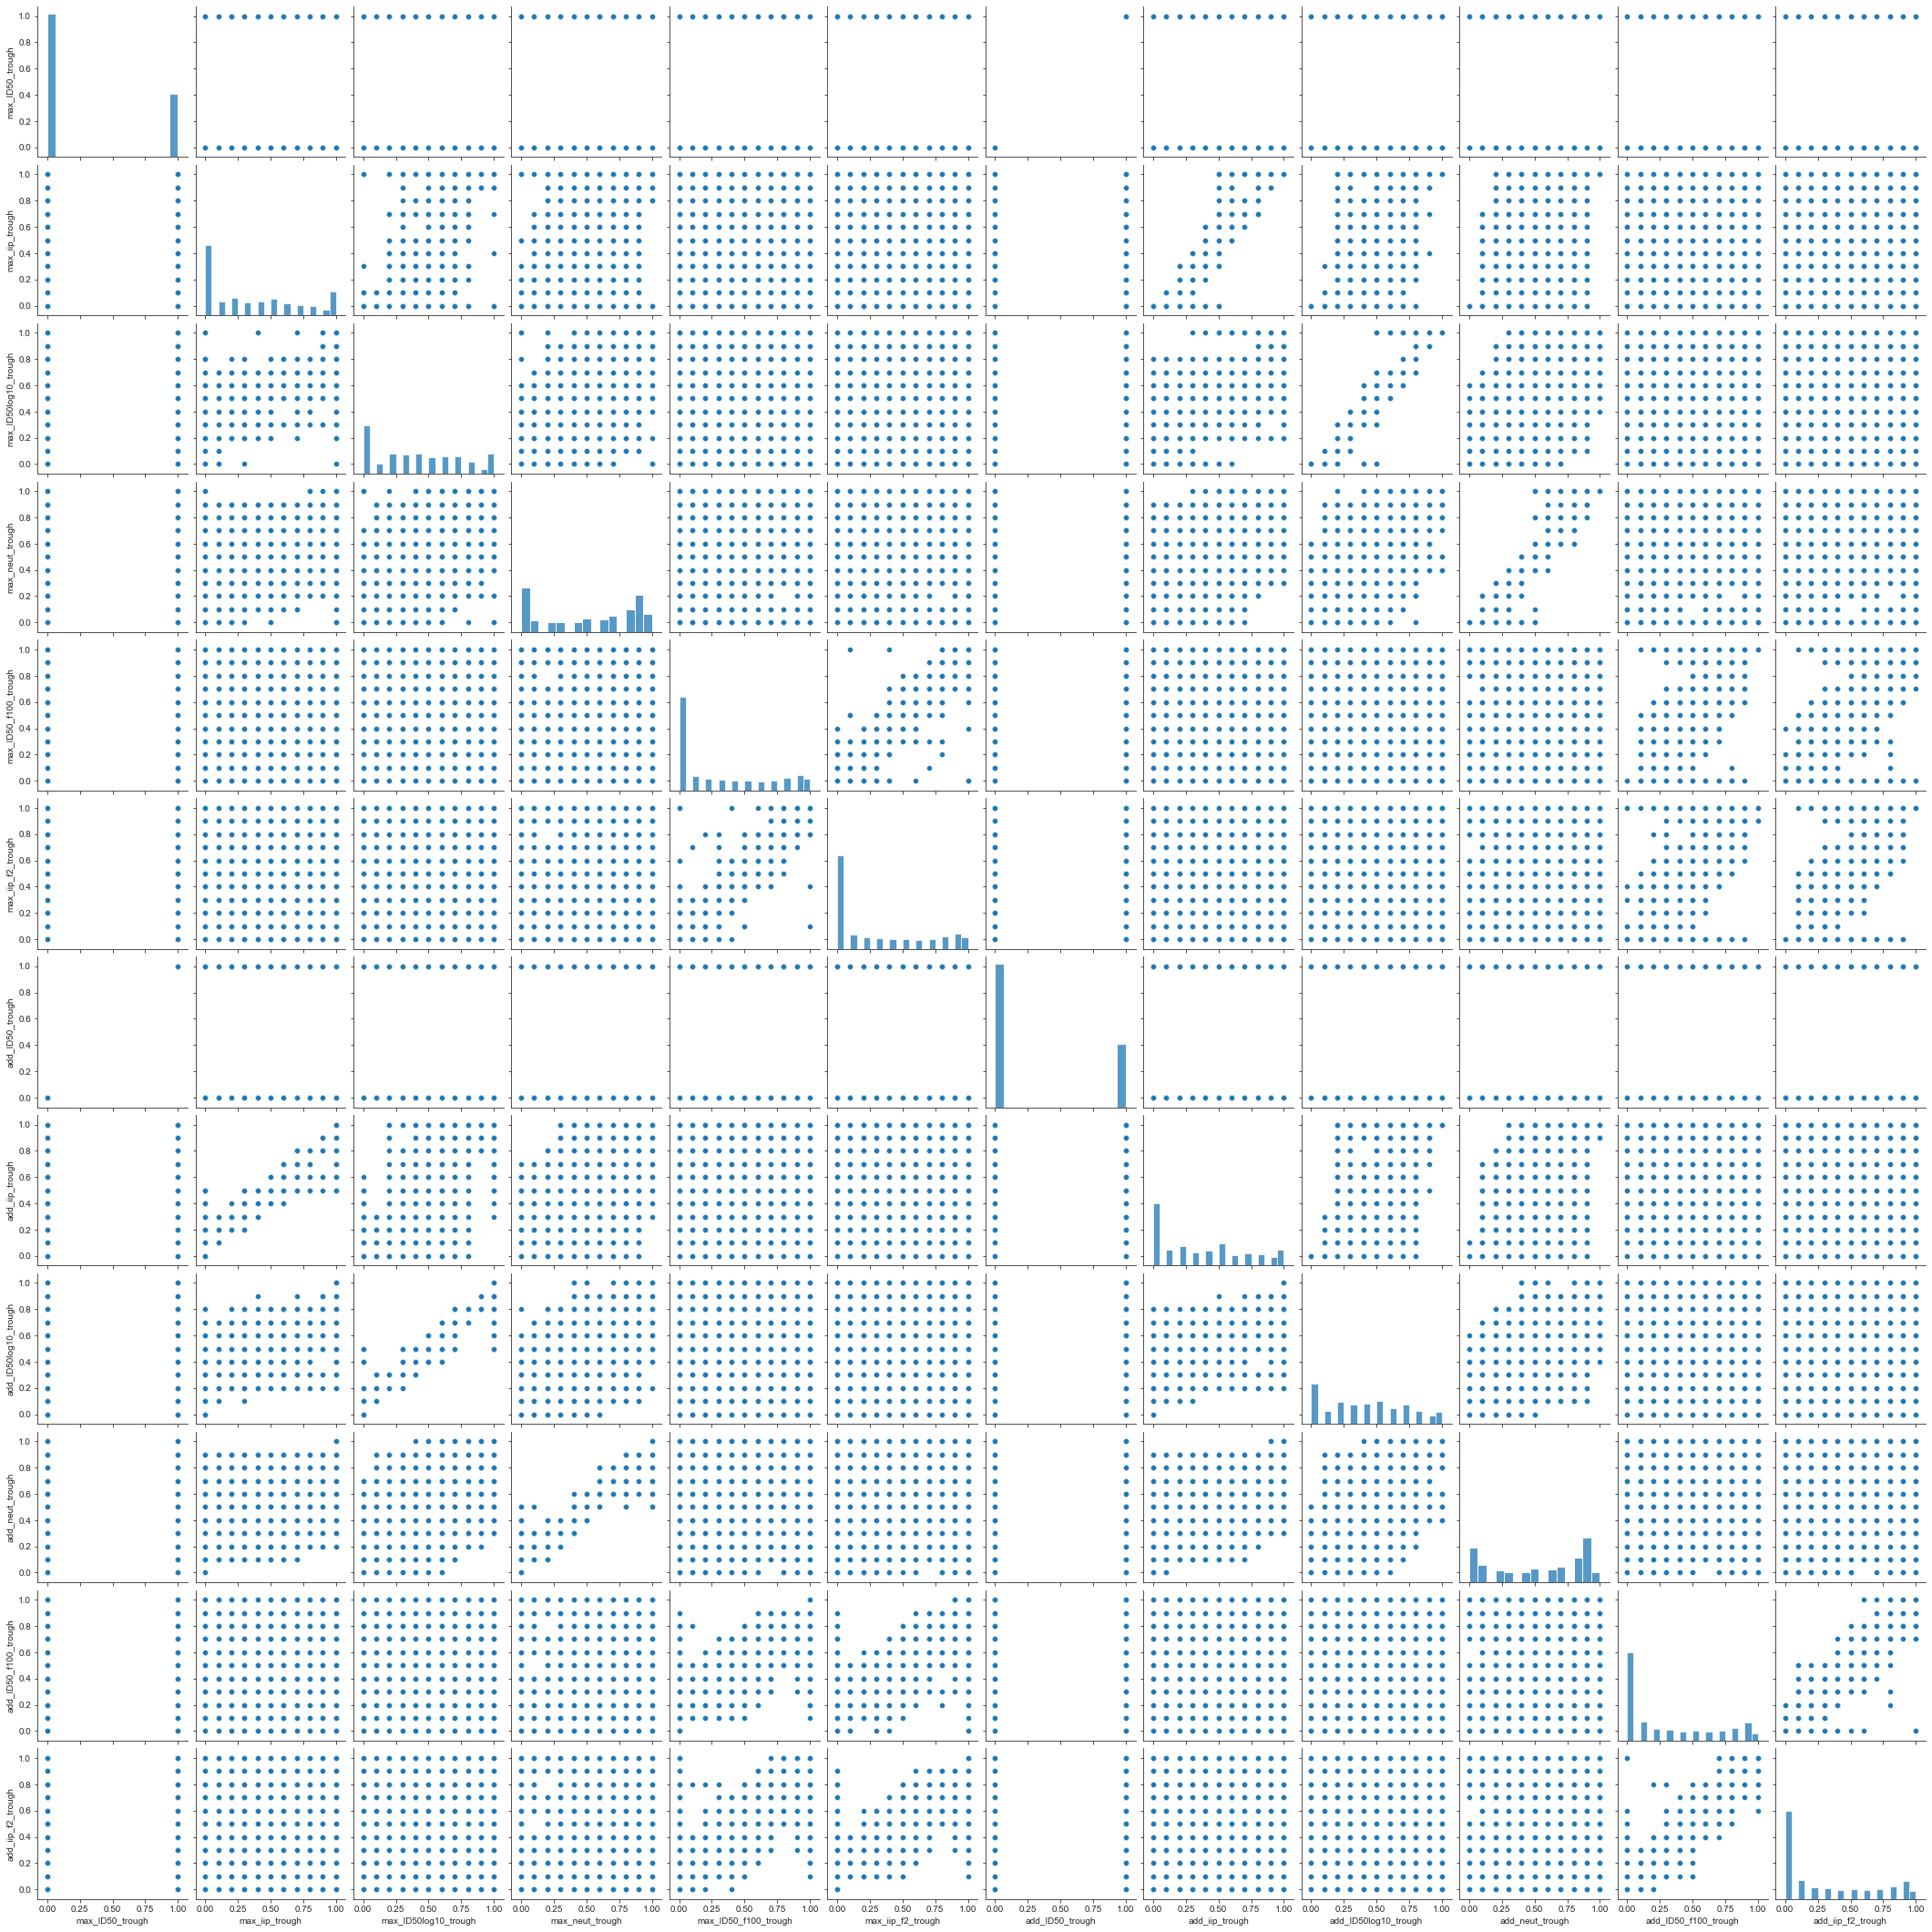

In [11]:
sns.pairplot(tdf)

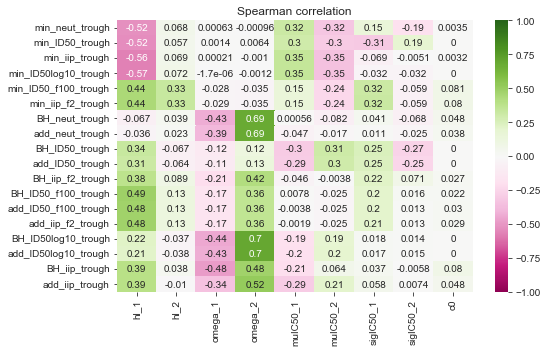

In [12]:
#plot sensitivity correlations against all variables with clustered labels

varz = [
    'hl_1',
    'hl_2',
    'omega_1',
    'omega_2',
    'muIC50_1',
    'muIC50_2',
    'sigIC50_1',
    'sigIC50_2',
    'c0']

tdf=df[list(clustered_outz)+varz]

outvar_corr_mat=tdf.corr(method="spearman")

plt.figure(figsize=(8,5))
#sns.heatmap(outvar_corr_mat, annot=False, vmin=-1,vmax=1,cmap='PiYG')
sns.heatmap(outvar_corr_mat.loc[list(clustered_outz),varz], annot=True, vmin=-1,vmax=1,cmap='PiYG')
plt.title('Spearman correlation')

#plt.yticks()
plt.tight_layout()
plt.savefig('../../output/sim_results/figures/outcomes_opt_vs_varz.pdf',dpi=600)


In [14]:
clustered_outz

array(['min_neut_trough', 'min_ID50_trough', 'min_iip_trough',
       'min_ID50log10_trough', 'min_ID50_f100_trough',
       'min_iip_f2_trough', 'BH_neut_trough', 'add_neut_trough',
       'BH_ID50_trough', 'add_ID50_trough', 'BH_iip_f2_trough',
       'BH_ID50_f100_trough', 'add_ID50_f100_trough', 'add_iip_f2_trough',
       'BH_ID50log10_trough', 'add_ID50log10_trough', 'BH_iip_trough',
       'add_iip_trough'], dtype='<U20')

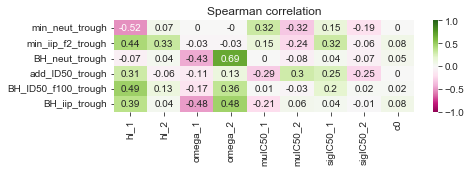

In [17]:
#correlate with variables -- broken into 5 main categories with representatives

final_outz = ['min_neut_trough', 
               'min_iip_f2_trough', 
              'BH_neut_trough', 
               'add_ID50_trough', 
       'BH_ID50_f100_trough', 
          'BH_iip_trough',
       ]

tdf=df[final_outz+varz]

outvar_corr_mat=tdf.corr(method="spearman").round(2)

plt.figure(figsize=(7,2.5))
#sns.heatmap(outvar_corr_mat, annot=False, vmin=-1,vmax=1,cmap='PiYG')
sns.heatmap(outvar_corr_mat.loc[final_outz,varz], annot=True, vmin=-1,vmax=1,cmap='PiYG')
plt.title('Spearman correlation')
plt.tight_layout()
plt.savefig('../../output/sim_results/figures/reducedoutcomes_opt_vs_varz.pdf',dpi=600)
